# Goals and Overview


My goal is to perform a elementary analysis on car advertisement data. I will begin by looking over the data for any changes that will help the analysis, like missing or duplicate values, or values with unoptimal data types. I will then look for anyways that I can enrich the data so my observations are more accurate. Lastly I will create certian graphs to visualize important parts of the data, so meaningful conclusions may be drawn.

## Initialization


In [1]:
#Importing necessary Libraries
import pandas as pd
from matplotlib import pyplot as plt

## Loading Data

In [2]:
#Reading Data
df = pd.read_csv('../vehicles_us.csv')

Mandatory columns seem to be (Price, Model, Condition, Fuel(economy?), Transmission, Type, Date Posted, Days Listed) 8/12
Columns with missing data are (Model Year, Cylinders, Odometer, Paint Color, Is 4WD) 4/12

Model Year will be changed to integer.
Fuel being an object will be further investigated.
Is 4WD should be a boolean.
Price and Cylinders will be investigated for better data type.
Date Posted will be converted to Date data type.

## Data Analysis

In [3]:
#Looking at Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
#Getting a sample of data
df.sample(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
288,28999,2012.0,ram 2500,good,6.0,diesel,146875.0,automatic,truck,silver,1.0,2018-07-22,51
29681,48500,2019.0,ford f250 super duty,excellent,8.0,diesel,NaN,automatic,pickup,white,1.0,2019-03-19,79
41349,17999,2016.0,toyota prius,excellent,4.0,hybrid,28454.0,automatic,sedan,green,NaN,2019-03-02,69
44621,7995,2004.0,ram 1500,good,8.0,gas,124449.0,automatic,truck,grey,1.0,2018-05-04,125
23659,14900,2016.0,nissan altima,good,4.0,gas,32300.0,automatic,sedan,white,NaN,2018-10-02,35
24693,3000,2003.0,nissan murano,excellent,6.0,gas,136000.0,automatic,SUV,NaN,1.0,2018-05-18,41
38202,8800,2012.0,volkswagen passat,excellent,4.0,diesel,740000.0,automatic,sedan,brown,NaN,2018-06-07,32
50293,4950,2001.0,jeep cherokee,excellent,6.0,gas,175000.0,automatic,SUV,green,1.0,2019-02-01,20
1353,3900,2003.0,jeep liberty,good,4.0,gas,128872.0,automatic,SUV,brown,NaN,2018-06-26,40
258,18675,2015.0,ram 1500,good,8.0,gas,86115.0,automatic,truck,NaN,1.0,2018-11-11,7


In [5]:
#Printing missing values
print('Missing values:')
print(df.isna().sum())
print()

#Printing unique values in the 'is_4wd' column
print('Unique values in "is_4WD":')
print(df['is_4wd'].unique())

Missing values:
price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Unique values in "is_4WD":
[ 1. nan]


## Fixing Data

In [6]:
#Changing 'date_posted' to datetime data type
df['date_posted'] = pd.to_datetime(df['date_posted'])

#Filling missing values in 'is_4wd' with 0 and changing to int data type
df['is_4wd'] = df['is_4wd'].fillna(0).astype('int64')
df.sample(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
20814,6400,NaN,jeep liberty,good,6.0,gas,124562.0,automatic,wagon,silver,1,2018-08-14,8
24273,18999,NaN,ford f-150,good,8.0,gas,157192.0,automatic,truck,NaN,1,2018-05-01,61
411,22975,NaN,ram 2500,excellent,6.0,diesel,119546.0,automatic,pickup,white,1,2019-02-01,9
30416,16500,2009.0,ford f-150,excellent,8.0,gas,83500.0,automatic,pickup,black,1,2018-11-26,15
34821,19995,NaN,ram 2500,like new,6.0,diesel,NaN,manual,truck,white,1,2018-10-28,47
12085,6400,2010.0,honda civic,excellent,4.0,gas,112000.0,automatic,coupe,grey,0,2018-06-14,68
22296,13950,2014.0,gmc sierra 2500hd,excellent,NaN,gas,148653.0,automatic,truck,NaN,1,2019-02-17,7
41077,19990,2010.0,ford f-350 sd,good,10.0,gas,51664.0,manual,truck,white,1,2019-04-11,45
50188,27995,NaN,ram 1500,excellent,8.0,gas,26301.0,automatic,pickup,black,1,2019-01-11,117
43572,15995,2014.0,chevrolet tahoe,good,8.0,gas,152000.0,automatic,SUV,white,1,2019-03-01,22


In [7]:
#Cleaning model column
df['model'] = df['model'].str.replace('f150', 'f-150')
df['model'] = df['model'].str.replace('f250', 'f-250')
df['model'] = df['model'].str.replace('f350', 'f-350')
df['model'] = df['model'].str.replace('sd', 'super duty')

df['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f-150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru im

## Enriching Data


In [8]:
#Adding Manufacturer column from the frist word in Model string
df['manufacturer'] = df['model'].apply(lambda x: x.split()[0])

#Removing Manufacturer from Model
df['model'] = df['model'].apply(lambda x: ' '.join(x.split()[1:]))

#Filling missing values for cylinders
df['cylinders'] = df[['cylinders', 'type']].groupby('type').transform(lambda x:x.fillna(x.median()))

#Filling missing values for model year
df['model_year'] = df[['model_year', 'model']].groupby('model').transform(lambda x:x.fillna(x.median()))

#Filling missing values for odometer
df['odometer'] = df[['odometer','model_year']].groupby('model_year').transform(lambda x:x.fillna(x.mean()))

df.sample(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
45466,4980,1997.0,f-150,good,8.0,gas,160700.000000,manual,pickup,silver,1,2018-07-11,27,ford
43806,8450,2007.0,tl,good,6.0,gas,160.000000,automatic,sedan,black,0,2019-03-08,5,acura
41784,16595,2017.0,fusion,excellent,4.0,gas,33347.000000,automatic,sedan,red,0,2018-11-13,35,ford
46110,3899,2006.0,f-150,excellent,6.0,gas,151711.440302,manual,truck,red,0,2019-02-18,17,ford
40842,4000,2006.0,300,good,6.0,gas,151711.440302,automatic,sedan,silver,0,2018-07-08,11,chrysler
24366,8995,1998.0,tahoe,like new,8.0,gas,173085.000000,automatic,SUV,white,0,2018-10-19,45,chevrolet
5417,18995,2013.0,sierra 1500,good,8.0,gas,95356.000000,automatic,truck,NaN,1,2018-08-19,109,gmc
24182,7700,2008.0,silverado 1500,good,8.0,gas,181000.000000,automatic,truck,white,1,2018-06-05,59,chevrolet
1727,18487,2017.0,equinox,excellent,6.0,gas,33392.000000,automatic,SUV,black,1,2018-06-21,64,chevrolet
33523,26995,2011.0,silverado 1500,excellent,8.0,gas,69875.000000,automatic,truck,blue,1,2019-01-05,30,chevrolet


In [9]:
df.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           1
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
manufacturer       0
dtype: int64

In [10]:
#Getting the models for each manufacturer
make_models = df.groupby('manufacturer')['model'].unique().reset_index()
make_models

,manufacturer,model
0,acura,[tl]
1,bmw,[x5]
2,buick,[enclave]
3,cadillac,[escalade]
4,chevrolet,"[silverado 1500, traverse, tahoe, silverado, m..."
5,chrysler,"[200, 300, town & country]"
6,dodge,"[charger, grand caravan, dakota]"
7,ford,"[f-150, fusion se, focus, f-150 supercrew cab ..."
8,gmc,"[yukon, sierra, sierra 2500hd, sierra 1500, ac..."
9,honda,"[pilot, accord, cr-v, civic, civic lx, odyssey]"


## Data Visualization


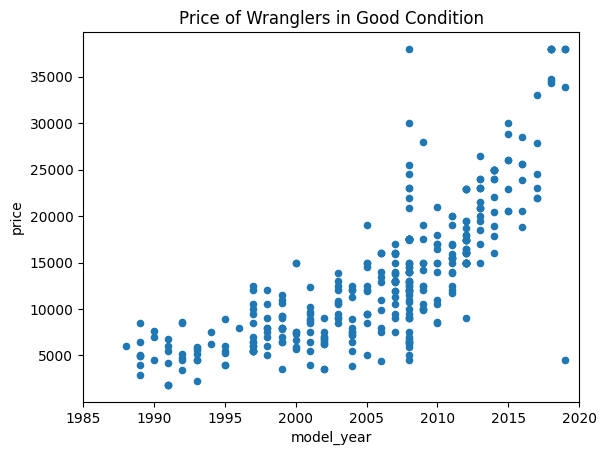

In [11]:
#Price of individual Jeep Wranglers in good condition by year
df.loc[(df['model'] == 'wrangler') & (df['condition'] == 'good')].plot(
    kind='scatter',
    x='model_year',
    xlim=[1985, 2020],
    y='price',
    title='Price of Wranglers in Good Condition'
)
plt.show()

C:\Users\crisl\AppData\Local\Temp\ipykernel_2824\1646667088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrangler_data['model_year'] = wrangler_data['model_year'].astype('int64')


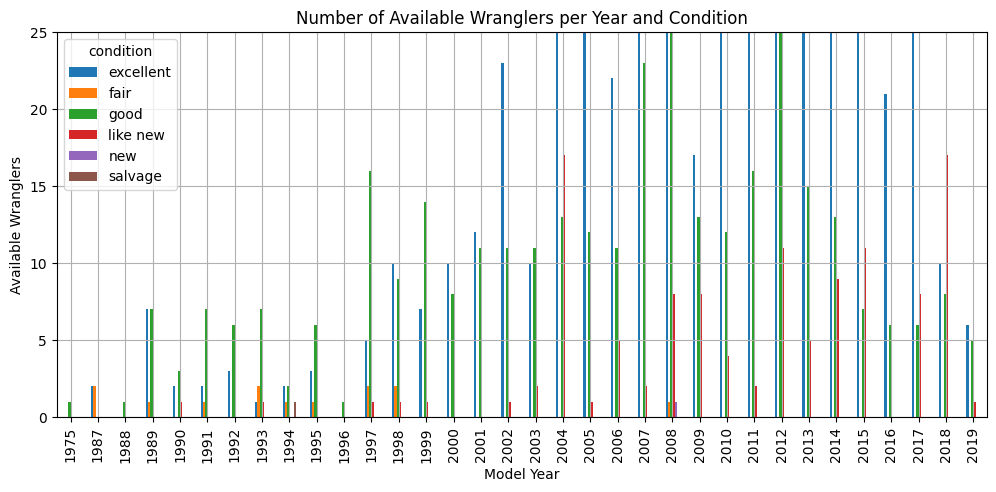

In [12]:
wrangler_data = df[df['model'] == 'wrangler']
wrangler_data = wrangler_data
wrangler_data['model_year'] = wrangler_data['model_year'].astype('int64')

grouped_df = wrangler_data.groupby(['model_year', 'condition'])['price'].count().reset_index(name='count')
pivot_df = grouped_df.pivot(
    index='model_year', 
    columns='condition', 
    values='count'
)

pivot_df.plot(
    kind='bar', 
    stacked=False, 
    figsize=[12, 5],
    title='Number of Available Wranglers per Year and Condition',
    xlabel='Model Year',
    ylabel='Available Wranglers',
    ylim=[0, 25],
    rot=90,
    legend=('Condition'),
    grid=True
)

plt.show()

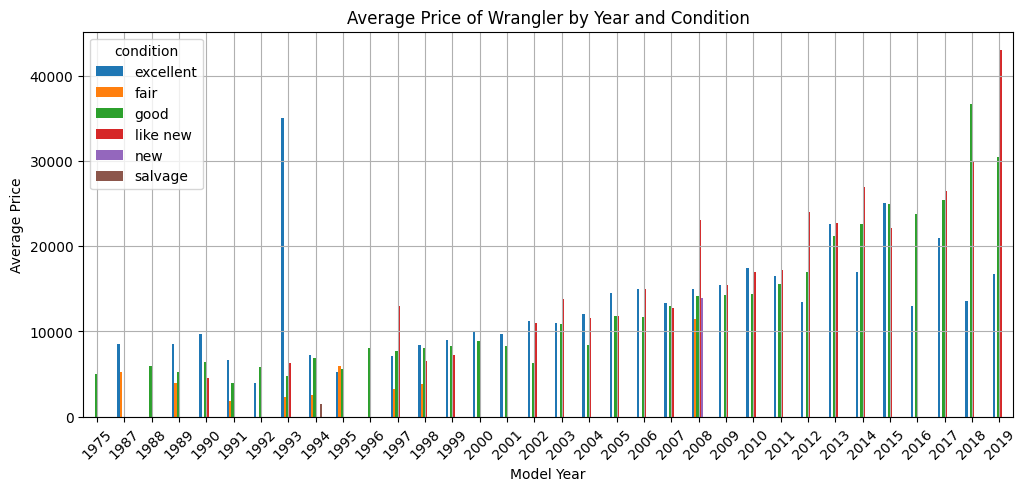

,model_year,condition,avg_price
0,1975,good,5000.000000
1,1987,excellent,8500.000000
2,1987,fair,5250.000000
3,1988,good,5995.000000
4,1989,excellent,8471.714286
...,...,...,...
92,2018,good,36688.000000
93,2018,like new,30023.882353
94,2019,excellent,16776.000000
95,2019,good,30477.000000


In [13]:
avg_wrangler_price = wrangler_data.groupby(['model_year', 'condition'])['price'].mean().reset_index(name='avg_price')
# Plot histogram

grouped_data = avg_wrangler_price.pivot(index='model_year', columns='condition', values='avg_price')

# Plot
grouped_data.plot(
    kind='bar',
    stacked=False,
    title='Average Price of Wrangler by Year and Condition',
    xlabel='Model Year',
    ylabel='Average Price',
    grid=True,
    legend='condition',
    rot=45,
    figsize=[12, 5],
    
)
plt.show()
avg_wrangler_price

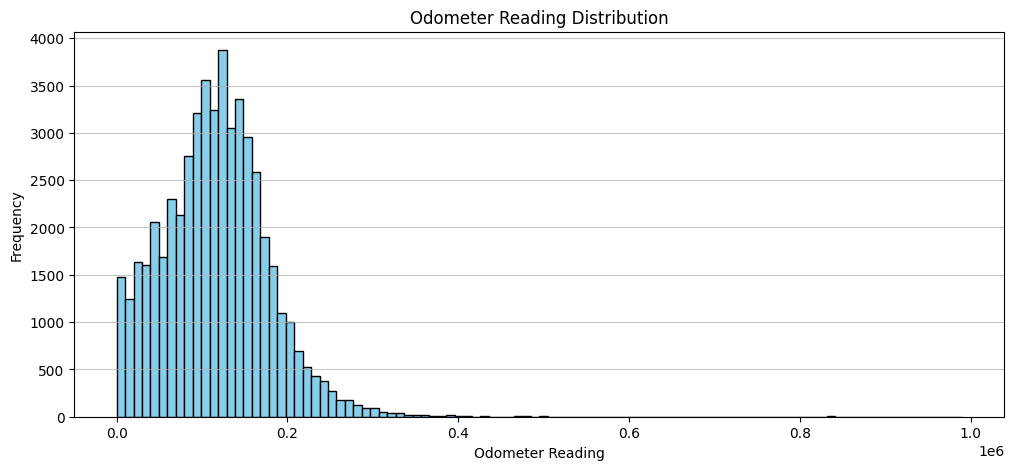

0        145000.000000
1         88705.000000
2        110000.000000
3        162071.751024
4         80903.000000
             ...      
51520     88136.000000
51521    181500.000000
51522    128000.000000
51523    139573.000000
51524     93648.703319
Name: odometer, Length: 51524, dtype: float64

In [14]:
odometer_data = df['odometer'].dropna()

# Plot histogram
plt.figure(figsize=(12, 5))
plt.hist(odometer_data, bins=100, color='skyblue', edgecolor='black')
plt.title('Odometer Reading Distribution')
plt.xlabel('Odometer Reading')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
odometer_data

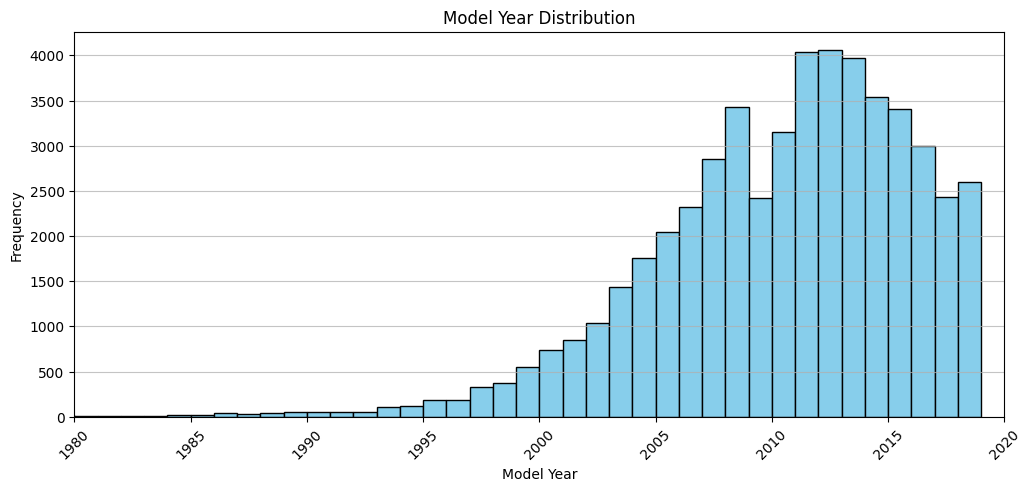

In [15]:
model_year_data = df['model_year']

# Plot histogram
plt.figure(figsize=(12, 5))
plt.hist(model_year_data, bins=range(int(model_year_data.min()), int(model_year_data.max()) + 1), color='skyblue', edgecolor='black')
plt.title('Model Year Distribution')
plt.xlabel('Model Year')
plt.xlim([1980, 2020])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45)
plt.show()

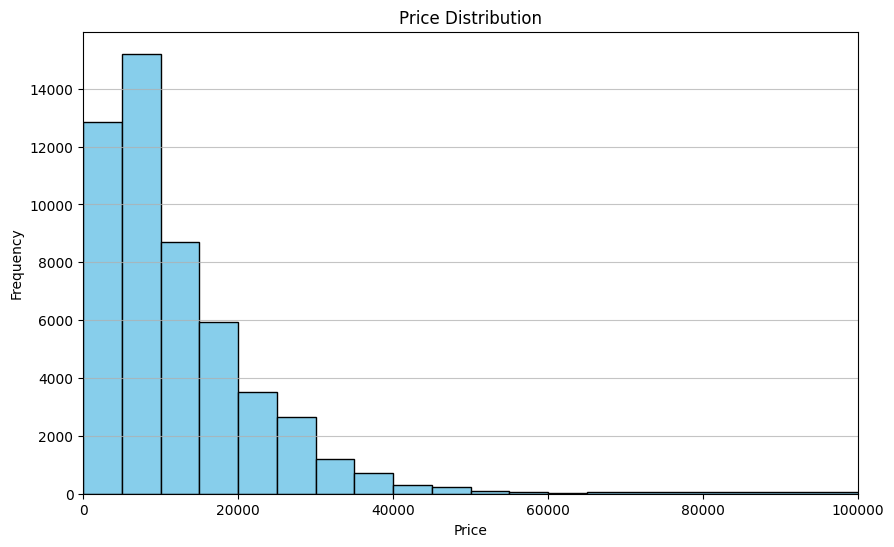

In [16]:
price_data = df['price']

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(price_data, bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 1000000], color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.xlim([0, 100000])
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

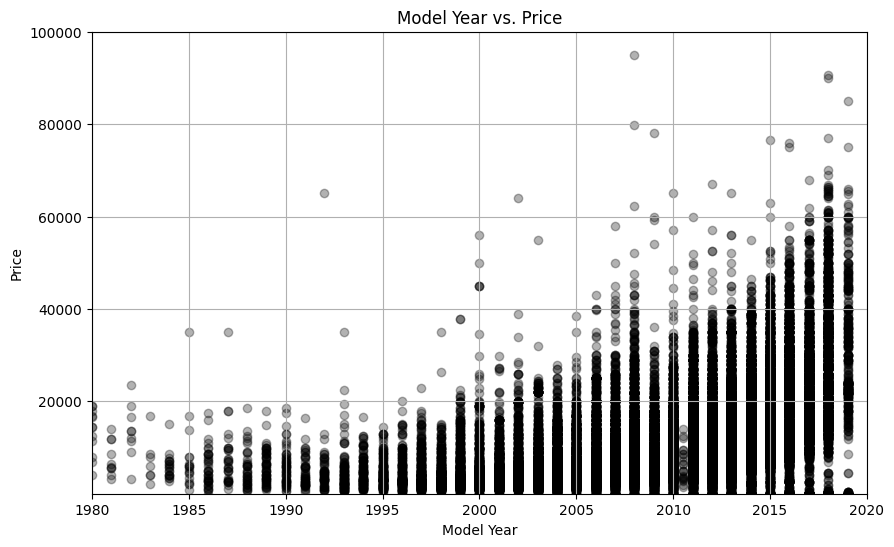

In [17]:
# Extracting data for scatterplot
model_year = df['model_year']
price = df['price']

# Plot scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(model_year, price, color='black', alpha=0.3)
plt.title('Model Year vs. Price')
plt.xlabel('Model Year')
plt.xlim([1980, 2020])
plt.ylabel('Price')
plt.ylim([1, 100000])
plt.grid(True)
plt.show()